In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [5]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')

# Find all books of a given language

In [13]:
meta.reset()

In [8]:
c_languages = meta.get_lang_counts()

In [9]:
arr_n = []
arr_l = []
for l,n in c_languages.most_common():
    arr_n += [n]
    arr_l += [l]
arr_n = np.array(arr_n)
arr_l = np.array(arr_l)

In [10]:
arr_n

array([45488,  2842,  1888,  1624,   781,   714,   585,   550,   438,
         219,   184,   178,   118,   113,    68,    60,    33,    31,
          20,    19,    12,    10,     7,     6,     6,     6,     5,
           5,     5,     4,     4,     3,     3,     3,     3,     3,
           3,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,     1])

In [11]:
arr_l

array(['en', 'fr', 'fi', 'de', 'nl', 'it', 'es', 'pt', 'zh', 'el', 'sv',
       'hu', 'eo', 'la', 'da', 'tl', 'ca', 'pl', 'ja', 'no', 'cy', 'cs',
       'is', 'enm', 'fur', 'te', 'bg', 'he', 'ru', 'ang', 'af', 'nai',
       'sr', 'nah', 'ilo', 'ceb', 'grc', 'ro', 'myn', 'ga', 'fy', 'mi',
       'nav', 'arp', 'gla', 'brx', 'sa', 'ale', 'kha', 'ia', 'kld', 'oc',
       'nap', 'gl', 'br', 'iu', 'bgs', 'csb', 'rmr', 'sl', 'oji', 'ar',
       'et', 'fa'], 
      dtype='<U3')

# Plot

In [12]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 12,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


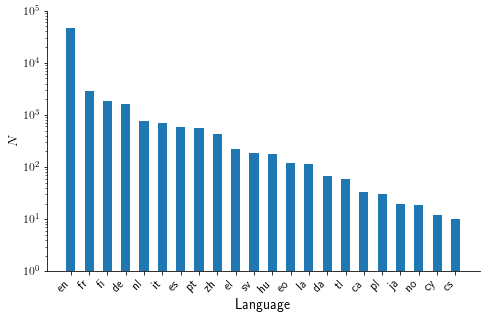

In [37]:
## restrict to e.g. more than 10 books!
## we could do the remaining in an inset

indmax = 22#len(arr_n)

x = np.arange(indmax)
y = arr_n[:indmax]
z = arr_l[:indmax]

# f=plt.figure(figsize = (10,20))
f=plt.figure()
ax=f.add_subplot(1,1,1)


ax.bar(x,y,width = 0.5)
ax.set_xlabel(r'Language')
ax.set_ylabel(r'$N$')

ax.set_xticks(x)
ax.set_xticklabels(z,rotation=45, ha='right')

# ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

ax.set_ylim(1,10**5)
# ax.set_xscale('log')
ax.set_yscale('log')
# plt.subplots_adjust(left=0.1,bottom=0.4)

path_save = os.path.join(os.pardir,'figures')
fname_save = 'basicstats-language.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename)